In [11]:
# Import necessary modules
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path
dataset_path = '/content/drive/MyDrive/Dataset'

Mounted at /content/drive


In [4]:
# Load the dataset
def load_dataset(path):
    data = []
    labels = []

    label_encoder = LabelEncoder()

    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            label = folder
            for filename in os.listdir(folder_path):
                if filename.endswith(".jpg"):
                    img_path = os.path.join(folder_path, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (64, 64))
                    data.append(img.flatten())
                    labels.append(label)

    labels_encoded = label_encoder.fit_transform(labels)

    return np.array(data), np.array(labels_encoded)

In [5]:
# Load the dataset
data, labels = load_dataset(dataset_path)

# Flatten and normalize pixel values
data = data.reshape((data.shape[0], -1)) / 255.0

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

In [7]:
# Train the model
decision_tree_classifier.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions on the test set
predictions = decision_tree_classifier.predict(test_data)

In [9]:
# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.37


In [10]:
# Display classification report
print("Classification Report:\n", classification_report(test_labels, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.42      0.39       608
           1       0.68      0.65      0.66       577
           2       0.20      0.21      0.21       606
           3       0.20      0.19      0.20       505
           4       0.46      0.37      0.41       493
           5       0.24      0.25      0.25       388
           6       0.20      0.21      0.21       507
           7       0.31      0.27      0.29       612
           8       0.28      0.27      0.27       509
           9       0.65      0.75      0.70       595

    accuracy                           0.37      5400
   macro avg       0.36      0.36      0.36      5400
weighted avg       0.37      0.37      0.37      5400



In [12]:
# Assume label_encoder is the same one used before
label_encoder = LabelEncoder()

# Fit and transform the labels to get the original class names
label_encoder.fit(np.concatenate([train_labels, test_labels]))
label_names = label_encoder.inverse_transform(np.unique(np.concatenate([train_labels, test_labels])))

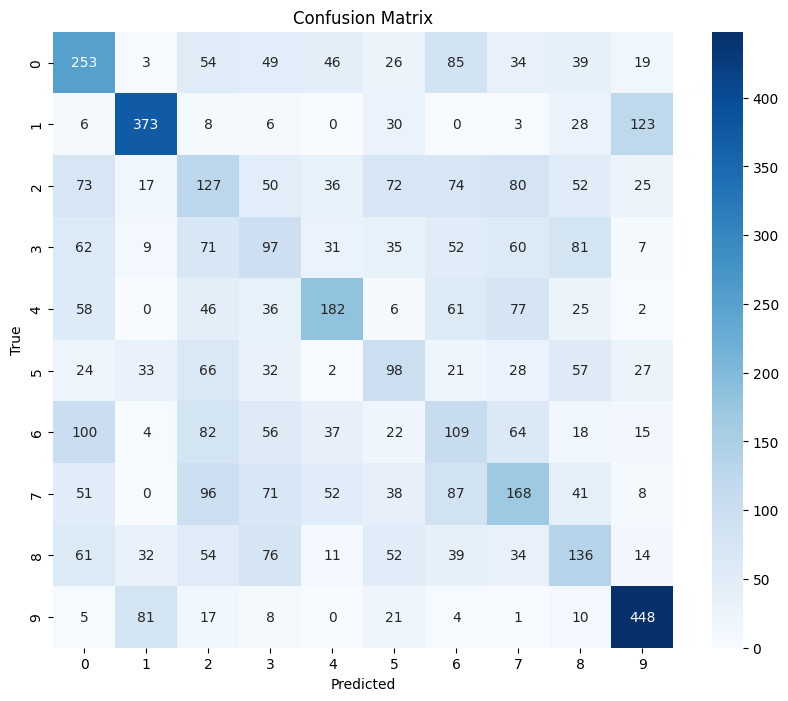

Precision: 0.1749
Recall: 0.3917
F1 Score: 0.3582
Area Under ROC Curve (AUC): 0.3842


In [13]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Assume conf_matrix is the multiclass confusion matrix
# Calculate Precision, Recall, F1 Score
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_labels, predictions, pos_label=1)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, predictions, pos_label=1)

# Display metrics
print(f"Precision: {np.mean(precision):.4f}")
print(f"Recall: {np.mean(recall):.4f}")
print(f"F1 Score: {np.mean(f1):.4f}")
print(f"Area Under ROC Curve (AUC): {roc_auc:.4f}")

In [14]:
# Save the trained model using joblib
joblib.dump(decision_tree_classifier, 'decision_tree_model.joblib')

# Load the saved model
loaded_decision_tree_model = joblib.load('decision_tree_model.joblib')